# Assignment: Orthogonality

---


<b><div style="text-align: right">[TOTAL POINTS: 30]</div></b>

Welcome to orthogonality assignment. This assignment will have two parts. In the first part, we will implement calculation of the projection vectors that we have been talking about for a while and visualize the results by plotting the vectors into subspaces as we discussed throughout the course. In the second phase, we will use this least square approach to develop a  regression model for Housing Price Prediction.

## Dataset Description
**Source:**: A housing dataset has been used in the second part of the assignment. Boston housing Dataset has been used in this project which has been directedly loaded from `sklearn` dataset and further details about this dataset can be found [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). There are fourteen attributes of the data set but we'll only use two as features and one as target.

Number of Instances: **506**

Number of Attributes: **3**

---

The features used for the prediction are as follows:

1.   **RM:** 
> average number of rooms per dwelling
2.   **AGE:** 
> proportion of owner-occupied units built prior to 1940
 

 The target of the is `MEDV` which is Median value of owner-occupied homes in $1000's.

 ## Part 1 : Basics of Projections

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## if you are using this notebook locally, then you can use interactive plot.
## comment line above, and uncomment line below
## %matplotlib qt

### Exercise 1: Working with Projection in 2d
<b><div style="text-align: right">[UNGRADED]</div></b>
We start with a simple projection problem in two dimension ($R^2$).

Consider the column vectors : $\vec a = \begin{bmatrix}
3\\ 
1
\end{bmatrix}$, $\vec b=\begin{bmatrix}
1\\ 
3
\end{bmatrix}$, each of shape 2 * 1. <br> Now you will calculate projection vector $\vec p$ obtained after projecting $\vec b$ along $\vec a$.

**Task:** 
- Start by defining vectors $\vec a$ and $\vec b$ as numpy array of shape $(2,1)$
- Initialize 2-dimensional vectors a = (1,3) , b = (3,1) using `np.array()`.

**Note:** Please use the exact same value of $a$ and $b$ which will be used in rest of the assignment


In [20]:
a = np.array([
    [3],
    [1]
])
b = np.array([
    [1],
    [3]
])
## define the values of a and b below
# YOUR CODE HERE


In [10]:
print(f'a:{a}\nb:{b}')
assert a.shape==(2,1)
assert b.shape==(2,1)


a:[[3]
 [1]]
b:[[1]
 [3]]


We have provided the function *plot_arrow_2d* and *plot_region*, for you to visualize the vectors $\vec a$ and $\vec b$ you just initilized in cell above. 

In [11]:
def plot_arrow_2d(vec, ax, color='r', width=0.001, head_width=3, name=None):
  
    """Plots a given 2d vector in an 2d axis 

    Parameters
    ----------
    x : array like
        Input vector to be plotted in 2d space, shape : (2,)
    ax : matplotlib.axes._subplots.AxesSubplot
        The predefined 2d axis where the input 2d vector is plotted
        
    Returns
    -------
    None
    """
    
    if name:
        ax.annotate(name, vec )
    ax.arrow(0,0,vec[0][0],vec[1][0],width=width,color = color,head_width= head_width*width)
  
  
def plot_region_2d():
    """Defines a two dimensional plane to plot our vectors"""
    
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes()

    xlimits = (-5,5)
    ylimits = (-8,8)
    ax.set_xlim(xlimits)
    ax.set_ylim(ylimits)
    stepsize = 1

    ax.xaxis.set_ticks(np.arange(*xlimits, stepsize))
    ax.yaxis.set_ticks(np.arange(*ylimits, stepsize))

    ax.plot([0,0],ylimits,zorder=1)
    ax.plot(xlimits,[0,0],zorder=1)
    plt.grid(b=True)
    ax.plot(0,0,'ok')

    return ax

In the cell below, we can visualize the vectors $\vec a$ and $\vec b$.


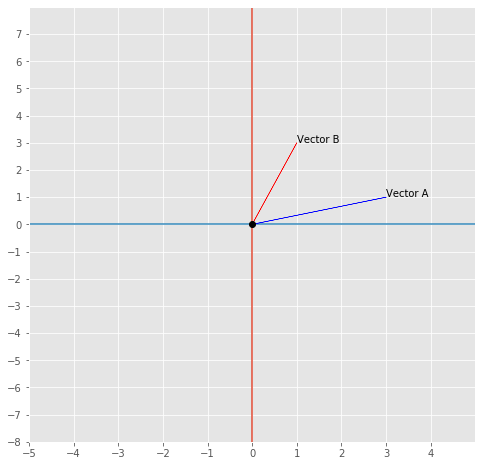

In [12]:
axes = plot_region_2d()

plot_arrow_2d(a,axes,color='b',name='Vector A')
plot_arrow_2d(b,axes,color='r',name='Vector B')

Now we go into calculating the projection vector $\vec p$ of $\vec b$ onto $\vec a$. Our calulation takes place as following sequence of steps. We have defined the shapes of each of inbetween calculations to make sure your numpy implementation is on right track.

 Step 1) Projection matrix : $P_{(2,2)}$  = $\frac {a_{(2,1)}a^T_{(1,2)}}{a^T_{(1,2)}a_{(2,1)}}$

 Step 2) Projectied Vector : $\vec p_{(2,1)}$ = $P_{(2,2)}\vec b_{(2,1)}$

### Exercise 2: Calculate Projection matrix
<b><div style="text-align:right">[POINTS: 5]</div></b>
Calculate Projection matrix as follow:
<center>
    $P_{(2,2)}$  = $\dfrac {a_{(2,1)}a^T_{(1,2)}}{a^T_{(1,2)}a_{(2,1)}}$
</center>

**Task:** 
- Calculate the  *numerator : $a_{(2,1)}a^T_{(1,2)}$* and *denimonator : $a^T_{(1,2)}a_{(2,1)}$*
- Divide *numerator* by *denominator*

**Note:** The numerator for $P$ as been done for you. Complete the rest of the code.

In [15]:
numerator_matrix = np.matmul(a,a.T)
denominator_scalar = np.matmul(a.T,a)
Projection_matrix = numerator_matrix/denominator_scalar
# YOUR CODE HERE


In [16]:
print('Shape of Numerator Matrix :',numerator_matrix.shape)
print('Shape of Denominator scalar :',denominator_scalar.shape)
assert numerator_matrix.shape == Projection_matrix.shape == (2,2)
assert denominator_scalar.shape == (1,1)

Shape of Numerator Matrix : (2, 2)
Shape of Denominator scalar : (1, 1)


### Exercise 3: Calculate Projected Vector
<b><div style="text-align:right">[POINTS: 5]</div></b>
Now calculate projection vector $\vec p$ using above projection matrix $P$. $P$ acts as transformation of $\vec p$ into space defined by column space of $\vec a$.

**Task:** 
- Calculate Projected vector $\vec p$  as follow:
<center>
    $\vec p_{(2,1)}$ = $P_{(2,2)}\vec b_{(2,1)}$
</center>

*Hint : use np.matmul*


In [44]:
projected_vector = None
# YOUR CODE HERE
projected_vector = np.matmul(Projection_matrix,b)

In [45]:
assert projected_vector.shape == (2,1)

Let plot the projected vector. if it's lying along $\vec a$, we are  certain your implementation is working all good.


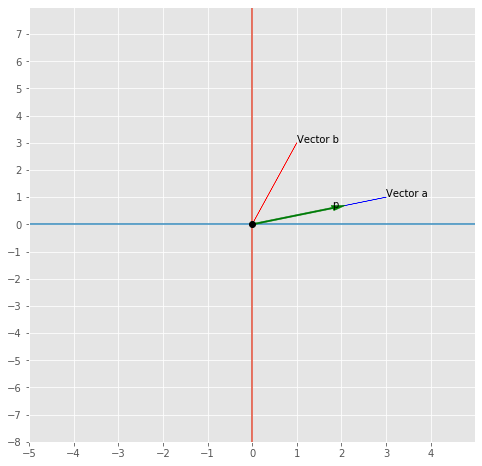

In [46]:
axes = plot_region_2d()

plot_arrow_2d(a,axes,color='b',name = 'Vector a')
plot_arrow_2d(b,axes,color='r',name = 'Vector b')
plot_arrow_2d(projected_vector,axes,color='g',width=0.05,name= 'p',head_width=4)

## Working with Projection in 3d ##

Now, after getting hang of projection in $R^2$, now, we will move into $R^3$, and see how the projection works out for subspaces


Let's start with a system of linear equation given below : 

$\quad \frac {1}{2}x +y = -1$

$\quad x+y  =  4 $

$\quad7x - y = 2$
    

We write the given system as $Ax = b$ : $  
\begin{bmatrix}
1/2 & 1\\ 
1 & 1\\
7 & -1
\end{bmatrix} 
\begin{bmatrix}
x\\ 
y\\
\end{bmatrix}    = 
\begin{bmatrix}
-1\\ 
4\\
2
\end{bmatrix}    
$

Further rewriting in terms of column picture :
$
x\begin{bmatrix}
1/2\\ 
1 \\
7 
\end{bmatrix}  + y
\begin{bmatrix}
1\\ 
1\\
-1\\
\end{bmatrix}    = 
\begin{bmatrix}
-1\\ 
4\\
2
\end{bmatrix}    
$

Suppose $\vec a_1 = (1/2,1,7)$, $\vec a_2 = (1,1,-1)$ , $\vec b=(-1,4,2)$

The above column picture demands that, the vector  $[-1,4,2]$ must lie in the subspace spanned by $[1/2,1, 7]$  and $[1,1,-1]$, for solution to exist. Let's visulize the column space of $A$ check if $\vec b$ falls onto this column space.  


### Exercise 4: Working with Projection in 3d
<b><div style="text-align:right">[UNGRADED]</div></b>
Initialize the column vectors $\vec a_1, \vec a_2$ and $\vec b$ as described above. Each  numpy array **must** be of  shape $(3,1)$

**Task:** 
- Initialize $\vec a_1$ = $(1/2, 1, 7)$
- Initialize $\vec a_2$ = $(1, 1, -1)$
- Initialize $\vec b$ = $(-1, 4, 2)$

In [48]:
a1 = np.array([
    [1/2,1,7]
]).reshape(-1,1)
a2 = np.array([
    [1,1,-1]
]).reshape(-1,1)
b = np.array([
    [-1,4,2]
]).reshape(-1,1)
# YOUR CODE HERE

In [49]:
assert a1.shape == a2.shape == b.shape == (3,1)

In cell below, we have defined functions for visualizing the column space for you.

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_vector_3d(x,ax,scaling_fac = 8,name=None):
    """Plots a given 3d vector in an predefined 3d axis 
    Parameters
    ----------
    x : array like
        Input vector to be plotted in 3d space
    ax : mpl_toolkits.mplot3d.axes3d.Axes3D
        The predefined 3d axis where the input is plotted
    scaling_fac : integer, optional, default None
        To define the length of plotted vector

    Returns
    -------
    None
    """ 
    if not name:
        name = ''
    
    x = [i[0]*float(scaling_fac) for i in x]
    X = np.array([0]) ; Y = np.array([0]) ; Z = np.array([0])
    U = np.array([x[0]]) ; V = np.array([x[1]]) ; W = np.array([x[2]])
    ax.quiver(X,Y,Z,U,V,W,color='red',pivot='tail',arrow_length_ratio=0.01)
    ax.text(x[0], x[1], x[2], name + ': ' + str(np.around(np.array(x)/scaling_fac,2)))
  
  
def plot_subspace(vector_1,vector_2,ax):
    """Plots a given 3d plane as a subspace of two vectors in a predefined 3d axis 

    Parameters
    ----------
    vector_1,vector_2 : array like, Shape : (3,)
        Input Column vector to be plotted in 3d space
    ax : mpl_toolkits.mplot3d.axes3d.Axes3D
        The predefined 3d axis where the input is plotted

    Returns
    -------
    None
    """
    
    normal = np.cross(np.squeeze(vector_1),np.squeeze(vector_2))

    x = np.linspace(-5, 16, 30)
    y = np.linspace(-5, 12, 30)

    d = 0 
    X, Y = np.meshgrid(x, y)
    z = (-normal[0] * X - normal[1] * Y - d) * 1. /normal[2]

    ax.plot_surface(X, Y, z, alpha=0.3,color = 'blue')
  
  
def plot_region_3d():
    """Define a 3d axis for plotting our Vectors and Subspaces"""
    
    fig = plt.figure(figsize=(8,4))
    ax = Axes3D(fig)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    return ax

Let's visualize the column space and where $\vec b$ actually falls into. if it does, we don't need to turn to least squares.


Note :To load the interactive 3d visualization for plot above, swap `%matplotlib inline` with `%matplotlib qt` in the first cell. And you must be running this notebook locally as well.






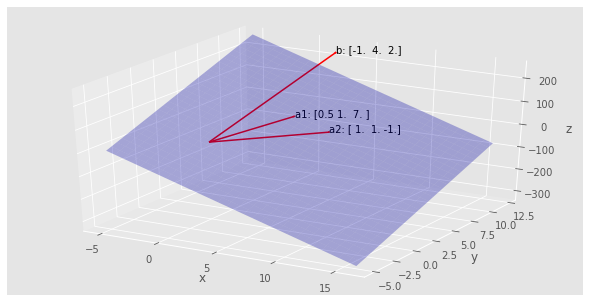

In [51]:
ax_3d = plot_region_3d()

## plotting our subspace for column vectors
plot_subspace(a1,a2,ax_3d)

## plotting each of vectors we defined

plot_vector_3d(a1,ax_3d,scaling_fac=6,name='a1')
plot_vector_3d(a2,ax_3d,scaling_fac=6,name='a2')
plot_vector_3d(b,ax_3d,scaling_fac=6,name='b')

As you can see, the linear equation we defined above cannot be solved with values of $\vec x=(x_1,x_2)$. Our $\vec b$ is not in the column space. So, no linear combination of columns of $A$ with $x,y$ can produce $\vec b$. However, we can find $\hat x$, $\hat y$ such that, the linear combination will give closest approximation of $\vec b$.

Intuitively, this best approximation of $\vec b$ is in fact the closest relative of $\vec b$ to column space of $A$ i.e. the projection of $\vec b$ onto  $C(A)$.
Now you will calculate the projection of $\vec b$ in the subspace of Column vectors $\vec a_1$,$\vec a_2$ of $A$

The $\vec x = (x_1,x_2)$ are such that, for each of the equation in our system of linear equations we defined, they output the closest approximation of each component of $\vec b$. i.e the error is minimum. Hence, we call it the least squares solution. 

### Step 1 : *Calculate* Projection Matrix $P$ ###


$\quad P_{(3,3)}$ = $A_{(3,2)}(A^TA)^{-1}_{(2,2)}A^T_{(2,3)}$ , where $A$ = $  
\begin{bmatrix}
1/2 & 1\\ 
1 & 1\\
7 & -1
\end{bmatrix} $


Just to remind, check for yourself. If $A$ has independent columns, $A^TA$ will have independent column as well.
But key insight is not that, but the fact that, If a matrix has indepentent columns, then it's inverse exists. This insight is basic but extremely prominent one, which we urge you to search for yourself.

Since $\vec a_1$ and $\vec a_2$ are independent linearly, we are certain $(A^TA)^{-1}$ exists.


 

### Exercise 5: Form a Matrix $A$
<b><div style="text-align:right">[UNGRADED]</div></b>
Form a matrix $A$ using $\vec a_1$ and $\vec a_2$ such that the two vector are the columns of matrix $A$

**Task:** 
- Calculate $A$: $A$ = $  
\begin{bmatrix}
\vec a_1 & \vec a_2
\end{bmatrix} $

*Hint: Use `np.hstack`*

In [55]:
A = None
# YOUR CODE HERE
A= np.hstack((a1,a2))

In [56]:
assert A.shape == (3,2)

### Exercise 6: *Calculate* Projection Matrix $P$
<b><div style="text-align:right">[POINTS: 10]</div></b>
Now using the matrix $A$ calulated above, calculate the Projection matrix $P$

**Task:** 
- Calculate $P$: $\quad P_{(3,3)}$ = $A_{(3,2)}(A^TA)^{-1}_{(2,2)}A^T_{(2,3)}$ , where $A$ = $  
\begin{bmatrix}
1/2 & 1\\ 
1 & 1\\
7 & -1
\end{bmatrix} $

**Note:** 
- $A$ has already been initialized above
- Just to remind, check for yourself. If $A$ has independent columns, $A^TA$ will have independent column as well.
But key insight is not that, but the fact that, If a matrix has indepentent columns, then it's inverse exists. This insight is basic but extremely prominent one, which we urge you to search for yourself.
Since $\vec a_1$ and $\vec a_2$ are independent linearly, we are certain $(A^TA)^{-1}$ exists.

In [62]:
# Now calculate Projection matrix based on formula above
A_transpose_A = None
A_transpose_A_inverse = None
Projection_matrix = None
# YOUR CODE HERE
A_transpose_A = A.T @ A
A_transpose_A_inverse = np.linalg.inv(A_transpose_A)
Projection_matrix = A @ A_transpose_A_inverse @ A.T

In [63]:
assert A_transpose_A.shape == (2,2)
assert Projection_matrix.shape == (3,3)

### Exercise 7: Calculate Projected Vector $\vec p$
<b><div style="text-align:right">[POINTS: 5]</div></b>
Now after the calculation of projection matrix $P$, calculate projected vector $\vec p$.

**Task:** 
- Calculate $\vec p$: $\vec p = P\vec b$

*Hint: Use* `np.matmul`

In [64]:
projection_vector = None
# YOUR CODE HERE
projection_vector = np.matmul(Projection_matrix, b)

In [65]:
assert projection_vector.shape == (3,1)

Let's see if the implementation is working correctly. If it
s correct, $P$ will transform $\vec b$ into the subspace of $C(A)$.

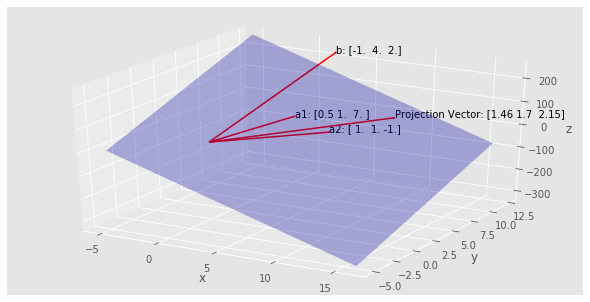

In [66]:
ax_3d = plot_region_3d()

## plotting our subspace for column vectors
plot_subspace(a1,a2,ax_3d)

## plotting each of vectors we defined
plot_vector_3d(a1,ax_3d,scaling_fac=6,name='a1')
plot_vector_3d(a2,ax_3d,scaling_fac=6,name='a2')
plot_vector_3d(b,ax_3d,scaling_fac=6,name='b')

## plotting the new projection vector
plot_vector_3d(projection_vector,ax_3d,scaling_fac=6,name='Projection Vector') # plot_vector_3d(None,ax_3d,scaling_fac=3) ## code here

You need to run this notebook locally if and turn on : %matplotlib qt, instead of %matplotlib line, for loading the interactive visualization. The visualization given above isn't clear. So, you have to take our word that projection vector is infact lying at the subspace. 

# Part 2 : Regression problem

In this section, we will take the concept of Projection, to solve a regression problem of a Boston Housing dataset. We will develop a simple model to predict housing prices. 


In [67]:
# Let's load and have a look at dataset.
from sklearn.datasets import load_boston
## We will use an extremely handy library, pandas to load the dataset from csv as numpy array.
import pandas as pd

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
     
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We wish to calculate housing price given by column **MEDV** given other feature vectors. For the sake of simplicity and visualization, we will only stick to using the columns **AGE** and **RM** as the features. 

In [68]:
## let's normalize the dataset into scale of 0-1
## we won't go into details for why we are normalizing the inputs
boston = boston[['RM','AGE','MEDV']]
boston = (boston - boston.min())/ (boston.max() - boston.min())
boston.head()

,RM,AGE,MEDV
0,0.577505,0.641607,0.422222
1,0.547998,0.782698,0.368889
2,0.694386,0.599382,0.660000
3,0.658555,0.441813,0.631111
4,0.687105,0.528321,0.693333


Now, going towards solving this problem, recall the concept we studied till now. We can write our problem in system of linear equation as $Ax = b$ :


$\quad\quad  
\begin{bmatrix}
1 & 0.577 & 0.641\\ 
1 & 0.547 & 0.782\\
1 & 0.694 & 0.599\\
. & . & . \\
. & . & . \\
\end{bmatrix} $
$ \begin{bmatrix}
x_{0}\\ 
x_{1}\\
x_{2}
\\
\end{bmatrix} =$ $ \begin{bmatrix}
0.422 \\
0.368 \\
0.660 \\
. \\
. \\
\end{bmatrix} $

**The parameters $\vec x = (x_{0},x_{1},x_{2})$ is the solution for the regression problem.**. Each feature column is acting a column vectors and we are trying the to find the best values of $(x_0,x_1,x_2)$ to approximate the values of $\vec b$ with least errors.

Similar to previous, we can write the equation in terms of column picture of $A$ as :

$\quad\quad
x_{0}\begin{bmatrix}
1 \\ 
1 \\
1 \\
. \\
. 
\end{bmatrix} +
x_{1}\begin{bmatrix}
0.577 \\ 
0.547 \\
0.694 \\
. \\
. 
\end{bmatrix} + $ $x_{2}\begin{bmatrix}
0.641 \\ 
0.782 \\
0.599 \\
. \\
. 
\end{bmatrix} =$ $\begin{bmatrix}
0.422 \\ 
0.368 \\
0.660 \\
. \\
. 
\end{bmatrix} $

Column space is in $R_{506}$, so we cannot visualize this dataset like prevoisuly. But we definitely can solve for the values of $\vec x$. Using equation below, we opt to find $\vec x =(x_0,x_1,x_2)$, as solution to our regression problem to boston housing dataset. 

$\quad \vec x_{(3,1)} = (A^TA)^{-1}_{(3,3)}A^T_{(3,506)}\vec b_{(506,1)}$


<br>
*Why  we added the column vector of $(1,1,1...)_{(506,1)}$ will be discussed in detail when you will get familiar with idea of regression. For now, just remember, while computing components of $\vec b$ as linear combination of components of $\vec a$, we are adding additional parameter as :  <br>
$( a1.x_{1} + a2.x_{2} = b_1 )$ ---> $( x_0 +  a1.x_{1} + a2.x_{2} = b_1 )$
<br>

This gives the model a further flexibility in approximating $b$



In [69]:
## writing our linear equations in terms of numpy arrays as we did previously

A = boston[['RM','AGE']].values
A = np.concatenate((np.ones((boston.shape[0],1)),A),axis = 1)
b = boston['MEDV'].values
print('No. of rows of dataset : ',boston.shape[0])
print('shape of A : ', A.shape)
print('shape of b : ', b.shape)

No. of rows of dataset :  506
shape of A :  (506, 3)
shape of b :  (506,)


### Exercise 8: Calculate weight $\vec x$
<b><div style="text-align:right">[POINTS: 5]</div></b>
Provided the matrix $A$ and vector $\vec b$ as boston['MEDV'], calculate $\vec x$ in
<center>
$A\vec x = \vec b$
</center>

**Task:** 
- Calculate $\vec x: \vec x = (A^TA)^{-1}A^T\vec b$

In [73]:
# We have prepared everything you need for calculation of the parameters x_0,x_2,x_3
# Find x using above formula
x = None
# YOUR CODE HERE
x= np.linalg.inv(A.T @ A) @ A.T @ b

In [74]:
assert x.shape == (3,)

Now, we predict the prices using our model as :

prediction_prices = np.matmul(A,x)

Let's visualize the dataset and see how the prediction is working

In [ ]:
#  graph the data
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# graph the original data, predicted data
ax.scatter(A[:, 1], A[:, 2], b, color='r', label='Actual Quality')
ax.scatter(A[:, 1], A[:, 2], np.matmul(A,x), color='g', label='Predicted Quality')

ax.set_xlabel('RM')
ax.set_ylabel('AGE')
ax.set_zlabel('MEDV')
plt.show()


Hence, we can seem we learned a plane of best fit to predict the **MEDV** value.